<a href="https://colab.research.google.com/github/samteccmrj/mlformacaodocente/blob/main/machine_learning_formacao_docente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicação de Machine Learning na Formação Docente para Sistemas Adaptativos com Apoio de IA Generativa**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_excel("diagnostico.xlsx", sheet_name="Respostas")
df

In [ ]:
colunas = [
    'Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?',
    'Como avalia sua produção de apresentações visuais (Canva, Genially)?',
    'Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?',
    'Qual seu nível em ética digital e segurança on-line?',
    'Como avalia sua criação de atividades em Ambiente Virtual?',
    'Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?',
    'Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?',
    'Como avalia sua análise crítica de mídias e notícias digitais?',
    'Com que frequência você utiliza ferramentas digitais nas suas aulas?',
    'Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?',
]

In [ ]:
dados = df[colunas]  # Definindo as colunas a serem usadas
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados_normalizados)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_clusters = df.copy()
df_clusters['cluster'] = kmeans.labels_

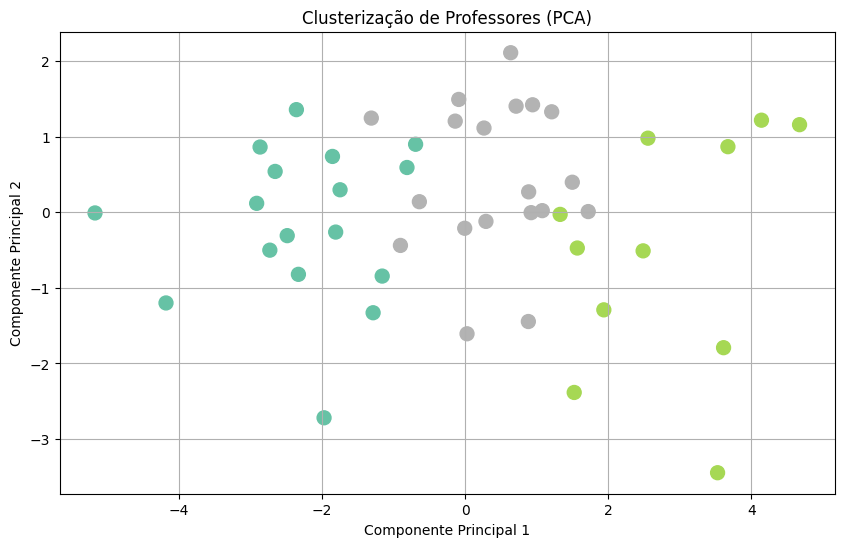

In [ ]:
pca = PCA(n_components=2)
pontos = pca.fit_transform(dados_normalizados)

plt.figure(figsize=(10, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], c=kmeans.labels_, cmap='Set2', s=100)
plt.title("Clusterização de Professores (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

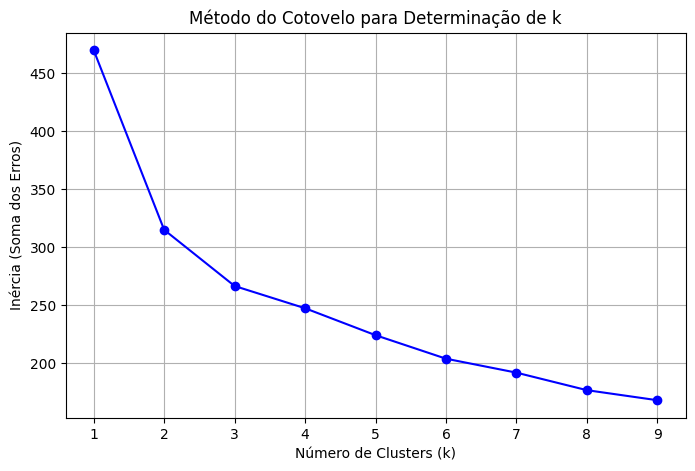

In [ ]:
inercia = []
K_range = range(1, 10)

for k in K_range:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(dados_normalizados)
    inercia.append(modelo.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Erros)')
plt.title('Método do Cotovelo para Determinação de k')
plt.grid(True)
plt.show()

In [ ]:
for k in range(2, 10):
    modelo = KMeans(n_clusters=k, random_state=42)
    rotulos = modelo.fit_predict(dados_normalizados)
    score = silhouette_score(dados_normalizados, rotulos)
    print(f'k = {k} → Silhouette Score = {score:.4f}')


k = 2 → Silhouette Score = 0.2613
k = 3 → Silhouette Score = 0.1850
k = 4 → Silhouette Score = 0.1496
k = 5 → Silhouette Score = 0.1651
k = 6 → Silhouette Score = 0.1489
k = 7 → Silhouette Score = 0.1254
k = 8 → Silhouette Score = 0.1280
k = 9 → Silhouette Score = 0.1218


In [ ]:

df_clusters['cluster'].value_counts()

,count
cluster,
2,19
0,17
1,11


In [ ]:
df_clusters.groupby('cluster')[colunas].mean().round(2)


,"Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?","Como avalia sua produção de apresentações visuais (Canva, Genially)?","Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",Qual seu nível em ética digital e segurança on-line?,Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,"Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?","Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?",Como avalia sua análise crítica de mídias e notícias digitais?,Com que frequência você utiliza ferramentas digitais nas suas aulas?,Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?
cluster,,,,,,,,,,
0,3.35,1.71,1.59,2.94,2.65,1.53,1.53,2.94,3.18,2.53
1,4.91,4.55,3.27,4.73,4.27,4.36,4.00,4.64,3.27,3.64
2,3.89,3.05,3.63,3.58,3.47,2.26,3.00,3.89,3.79,3.68


<Figure size 1000x800 with 0 Axes>

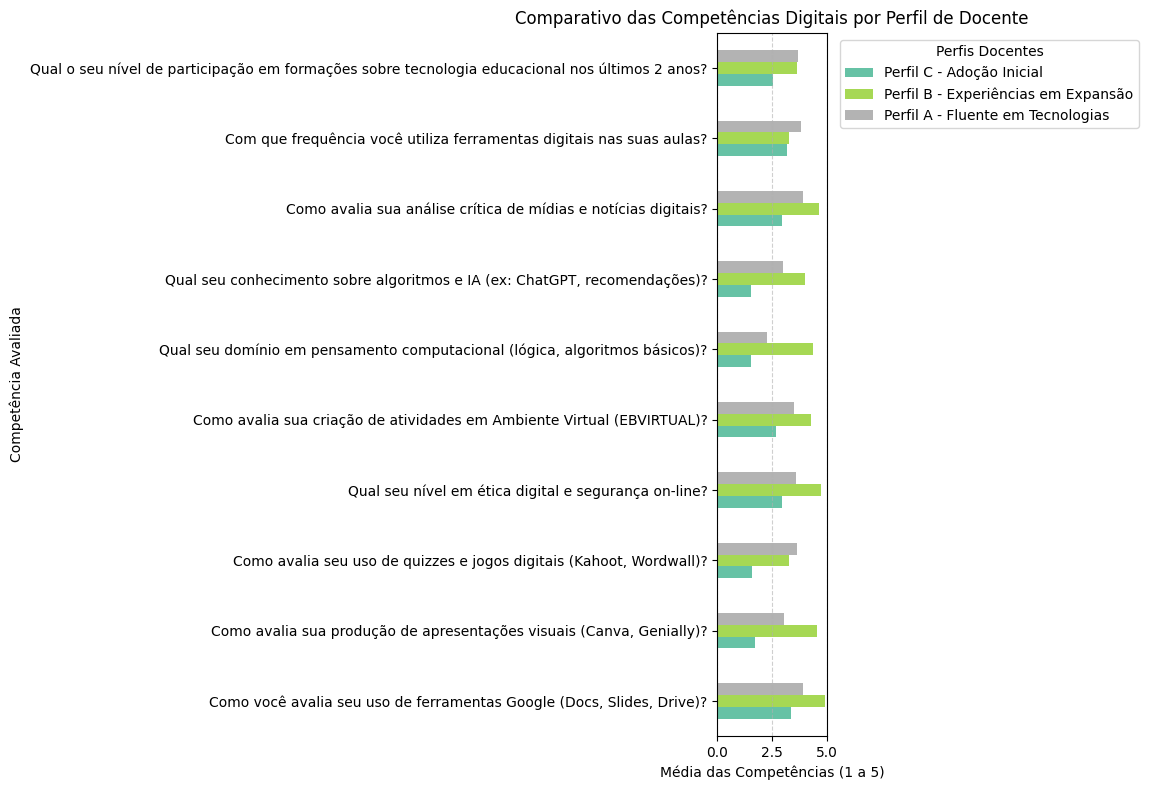

In [ ]:
medias = df_clusters.groupby('cluster')[colunas].mean().round(2).T

nomes_cluster = {
    0: "Perfil C - Adoção Inicial",
    1: "Perfil B - Experiências em Expansão",
    2: "Perfil A - Fluente em Tecnologias"
}
medias = medias.rename(columns=nomes_cluster)

plt.figure(figsize=(10, 8))
medias.plot(kind='barh', figsize=(12, 8), colormap='Set2')

plt.title("Comparativo das Competências Digitais por Perfil de Docente")
plt.xlabel("Média das Competências (1 a 5)")
plt.ylabel("Competência Avaliada")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title="Perfis Docentes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df_clusters['cluster'], df_clusters['Disciplina(s) que leciona'])

Disciplina(s) que leciona,Agente de Ensino,Arte,Biologia,CFB,Filosofia,Física,Geografia,História,LEM,Língua Portuguesa,Matemática,Quimica
cluster,,,,,,,,,,,,
0,2,0,0,3,0,1,3,2,3,1,1,1
1,1,1,0,0,0,1,1,3,1,1,2,0
2,1,1,2,0,1,0,2,1,5,4,2,0


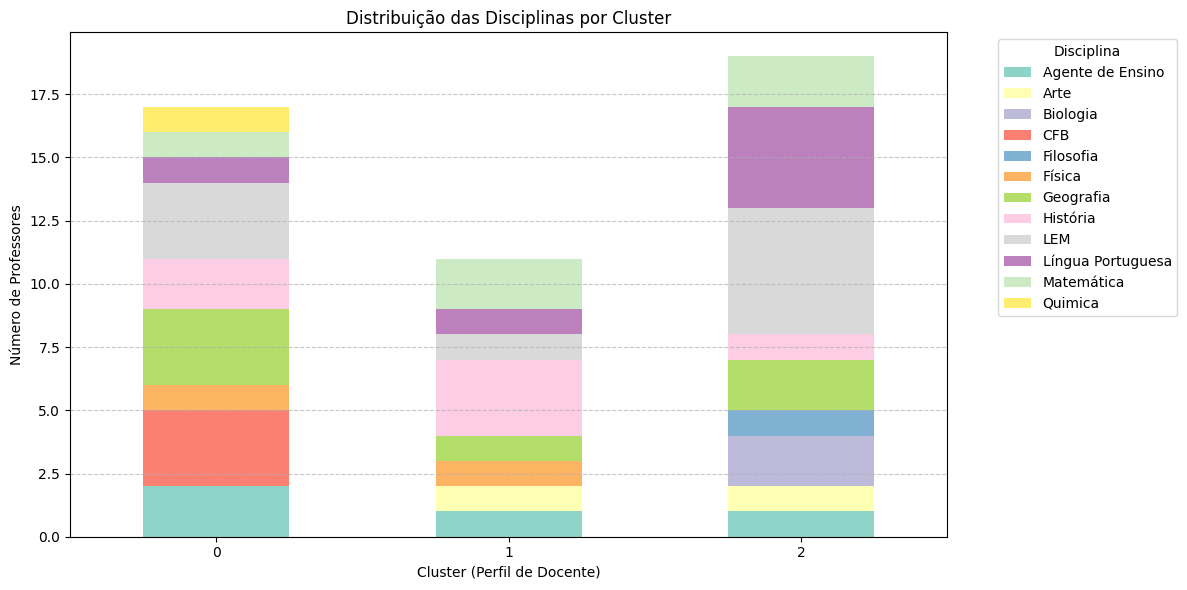

In [ ]:
crosstab_disciplinas = pd.crosstab(df_clusters['cluster'], df_clusters['Disciplina(s) que leciona'])

crosstab_disciplinas.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Distribuição das Disciplinas por Cluster")
plt.xlabel("Cluster (Perfil de Docente)")
plt.ylabel("Número de Professores")
plt.xticks(rotation=0)
plt.legend(title="Disciplina", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
pd.crosstab(df_clusters['cluster'], df_clusters['Ano(s) Escolar(es)'])


Ano(s) Escolar(es),1º Ano EM,6º Ano EF,7º Ano EF,8º Ano EF,9º Ano EF,Agente de Ensino
cluster,,,,,,
0,4,2,3,4,2,2
1,3,1,2,4,0,1
2,6,4,1,2,5,1


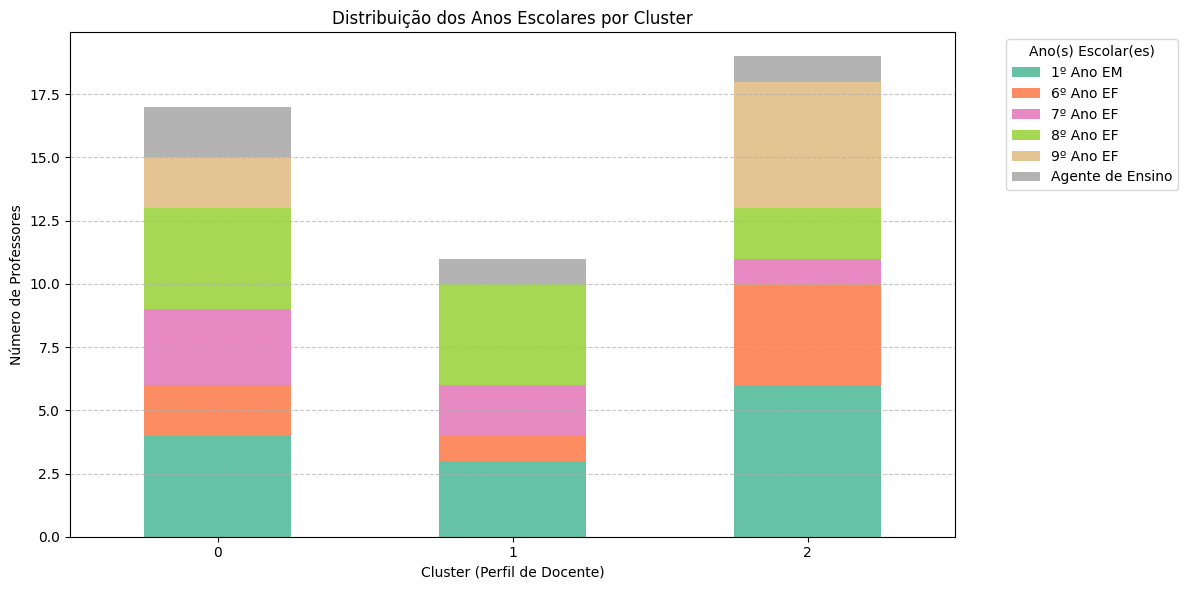

In [ ]:
crosstab_anos = pd.crosstab(df_clusters['cluster'], df_clusters['Ano(s) Escolar(es)'])

crosstab_anos.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Distribuição dos Anos Escolares por Cluster")
plt.xlabel("Cluster (Perfil de Docente)")
plt.ylabel("Número de Professores")
plt.xticks(rotation=0)
plt.legend(title="Ano(s) Escolar(es)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
nomes_cluster = {
    0: "Perfil C - Docente com adoção inicial de recursos tecnológicos",
    1: "Perfil B - Docente engajado com experiências digitais em expansão",
    2: "Perfil A - Docente Fluente em Tecnologias Emergentes e Autonomia Digital"
}

df_clusters['perfil_nomeado'] = df_clusters['cluster'].map(nomes_cluster)

In [ ]:
distribuicao = df_clusters['perfil_nomeado'].value_counts().rename_axis("Perfil").reset_index(name="Número de Professores")

styled_table = (
    distribuicao.style
    .set_caption("Distribuição dos Perfis Docentes")
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#e3e3e3'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'center')]
    }])
    .format(precision=0)
    .hide(axis="index")
)

styled_table

Perfil,Número de Professores
Perfil A - Docente Fluente em Tecnologias Emergentes e Autonomia Digital,19
Perfil C - Docente com adoção inicial de recursos tecnológicos,17
Perfil B - Docente engajado com experiências digitais em expansão,11


In [ ]:
import pandas as pd

df_auto = pd.read_excel("/content/autoavaliacao_e_percepcao.xlsx")
df

In [ ]:
# Remover espaços no nome das colunas
df_auto.columns = df_auto.columns.str.strip()

In [ ]:
colunas_competencias = [
    'Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?',
    'Como avalia sua produção de apresentações visuais (Canva, Genially)?',
    'Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?',
    'Qual seu nível em ética digital e segurança on-line?',
    'Como avalia sua criação de atividades em Ambiente Virtual?',
    'Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?',
    'Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?',
    'Como avalia sua análise crítica de mídias e notícias digitais?',
    'Com que frequência você utiliza ferramentas digitais nas suas aulas?',
    'Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?',
]

In [ ]:
df_auto[colunas_competencias].describe().T

,count,mean,std,min,25%,50%,75%,max
"Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?",47.0,3.808511,0.875718,2.0,3.0,4.0,4.0,5.0
"Como avalia sua produção de apresentações visuais (Canva, Genially)?",47.0,2.659574,1.255883,1.0,2.0,3.0,3.0,5.0
"Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",47.0,2.936170,1.357816,1.0,2.0,3.0,4.0,5.0
Qual seu nível em ética digital e segurança on-line?,47.0,3.553191,1.157368,1.0,3.0,4.0,4.5,5.0
Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,47.0,3.404255,1.116274,1.0,3.0,3.0,4.0,5.0
"Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?",47.0,2.468085,1.248496,1.0,1.5,2.0,3.0,5.0
"Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?",47.0,3.063830,1.008750,1.0,2.0,3.0,4.0,5.0
Como avalia sua análise crítica de mídias e notícias digitais?,47.0,3.787234,0.858111,2.0,3.0,4.0,4.0,5.0
Com que frequência você utiliza ferramentas digitais nas suas aulas?,47.0,3.340426,1.048324,1.0,2.5,3.0,4.0,5.0
Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?,47.0,3.319149,1.023769,1.0,3.0,3.0,4.0,5.0


In [ ]:
# Padronizar os nomes para evitar erros na junção
df_clusters['Nome Completo'] = df_clusters['Nome Completo'].str.strip()
df_auto['Nome Completo'] = df_auto['Nome Completo'].str.strip()

# Juntar os dois datasets com base no nome
df_merged = pd.merge(df_clusters, df_auto, on='Nome Completo', suffixes=('_diag', '_pos'))

# Visualizar os primeiros dados combinados
df_merged[['Nome Completo', 'cluster'] + [c + '_diag' for c in colunas_competencias[:3]]]

In [ ]:
ganhos = pd.DataFrame()
ganhos['Nome Completo'] = df_merged['Nome Completo']
ganhos['cluster'] = df_merged['cluster']

for col in colunas_competencias:
    col_diag = f"{col}_diag"
    col_pos = f"{col}_pos"
    ganhos[col] = df_merged[col_pos] - df_merged[col_diag]

In [ ]:
ganhos_medios = ganhos.groupby('cluster')[colunas_competencias].mean().round(2)
ganhos_medios

,"Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?","Como avalia sua produção de apresentações visuais (Canva, Genially)?","Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",Qual seu nível em ética digital e segurança on-line?,Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,"Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?","Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?",Como avalia sua análise crítica de mídias e notícias digitais?,Com que frequência você utiliza ferramentas digitais nas suas aulas?,Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?
cluster,,,,,,,,,,
0,0.24,0.41,0.71,0.12,0.35,0.41,1.00,0.76,0.18,0.41
1,-0.18,-1.00,-0.09,-0.55,-0.55,-0.55,0.09,-0.45,0.18,0.36
2,-0.42,-0.42,-0.26,0.05,0.11,-0.11,-0.05,-0.26,-0.53,-0.42


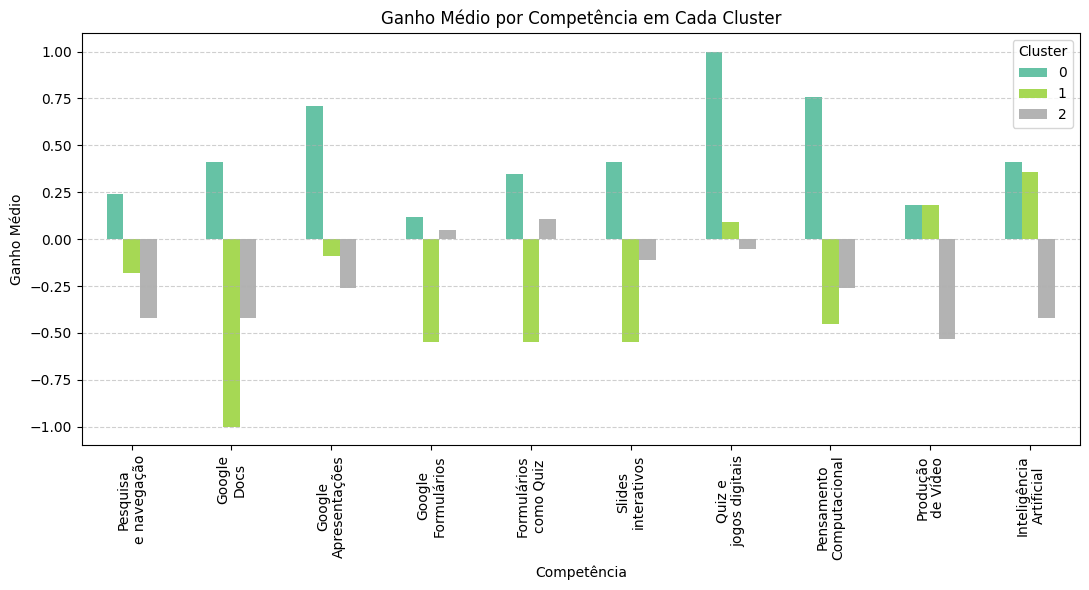

In [ ]:
import matplotlib.pyplot as plt

# Quebrar os nomes das competências manualmente
competencias_quebradas = [
    'Pesquisa\ne navegação',
    'Google\nDocs',
    'Google\nApresentações',
    'Google\nFormulários',
    'Formulários\ncomo Quiz',
    'Slides\ninterativos',
    'Quiz e\njogos digitais',
    'Pensamento\nComputacional',
    'Produção\nde Vídeo',
    'Inteligência\nArtificial'
]

# Garantir que os nomes quebrados estejam no índice (linhas) do gráfico
ganhos_medios_ajustado = ganhos_medios.T.copy()
ganhos_medios_ajustado.index = competencias_quebradas

# Plotar o gráfico com os nomes ajustados
ax = ganhos_medios_ajustado.plot(kind='bar', figsize=(11, 6), colormap='Set2')
ax.set_title("Ganho Médio por Competência em Cada Cluster")
ax.set_xlabel("Competência")
ax.set_ylabel("Ganho Médio")
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Lista com os títulos exatos das perguntas da Escala Likert
colunas_likert = [
    'O conteúdo abordado foi claro e bem estruturado.',
    'As ferramentas digitais utilizadas foram acessíveis e fáceis de aplicar.',
    'Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.',
    'O curso contribuiu para minha evolução profissional.',
    'Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.',
    'As atividades propostas favorecerão meu aprendizado.',
    'A IA generativa (ChatGPT/DALL·E) foi útil na criação do minicurso.'
]

# Agrupar por cluster e calcular média por pergunta
likert_medias = df_merged.groupby('cluster')[colunas_likert].mean().round(2)
likert_medias

,O conteúdo abordado foi claro e bem estruturado.,As ferramentas digitais utilizadas foram acessíveis e fáceis de aplicar.,Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.,O curso contribuiu para minha evolução profissional.,Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.,As atividades propostas favorecerão meu aprendizado.,A IA generativa (ChatGPT/DALL·E) foi útil na criação do minicurso.
cluster,,,,,,,
0,4.82,4.65,3.88,4.53,4.06,4.53,4.47
1,5.00,5.00,4.64,4.91,4.73,4.91,4.45
2,4.58,4.58,4.16,4.63,4.26,4.63,4.47


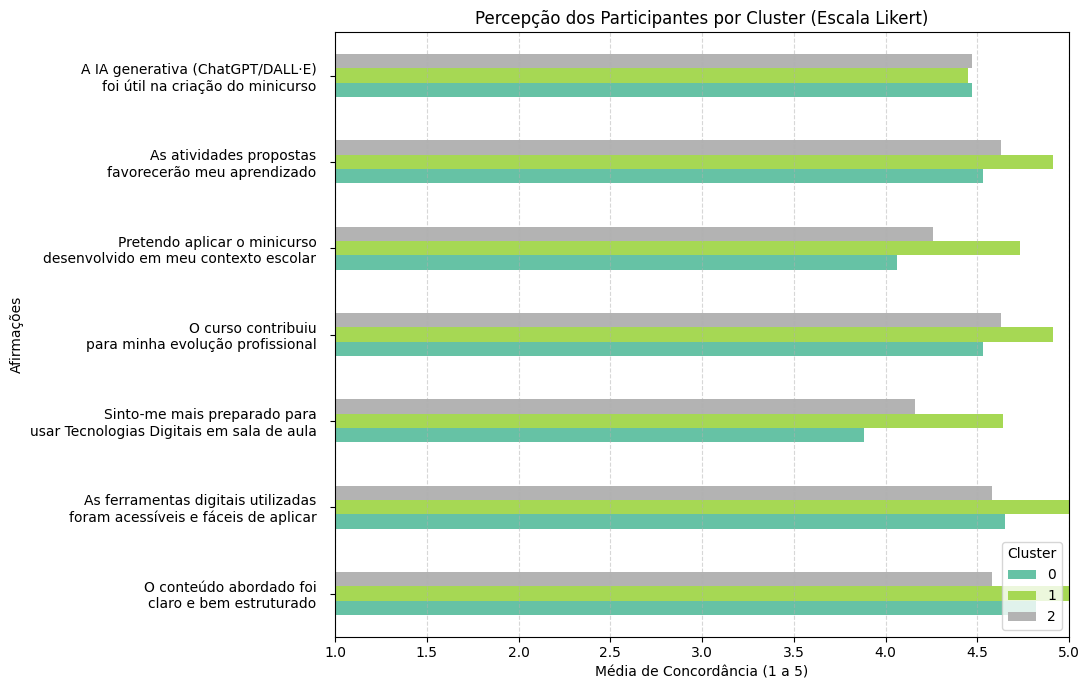

In [ ]:
import matplotlib.pyplot as plt

# Lista com as afirmações quebradas manualmente
afirmacoes_quebradas = [
    "O conteúdo abordado foi\nclaro e bem estruturado",
    "As ferramentas digitais utilizadas\nforam acessíveis e fáceis de aplicar",
    "Sinto-me mais preparado para\nusar Tecnologias Digitais em sala de aula",
    "O curso contribuiu\npara minha evolução profissional",
    "Pretendo aplicar o minicurso\ndesenvolvido em meu contexto escolar",
    "As atividades propostas\nfavorecerão meu aprendizado",
    "A IA generativa (ChatGPT/DALL·E)\nfoi útil na criação do minicurso"
]

# Ajustar o índice
likert_plot = likert_medias.T.copy()
likert_plot.index = afirmacoes_quebradas

# Criar gráfico horizontal
ax = likert_plot.plot(kind='barh', figsize=(11, 7), colormap='Set2')

# Apenas ajustar espaçamento dos rótulos do eixo Y
ax.tick_params(axis='y', pad=10)

# Título e labels
ax.set_title("Percepção dos Participantes por Cluster (Escala Likert)")
ax.set_xlabel("Média de Concordância (1 a 5)")
ax.set_ylabel("Afirmações")
ax.set_xlim(1, 5)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.legend(title='Cluster', loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Merge dos ganhos com percepções Likert, mantendo Nome Completo e cluster
df_percepcao = df_merged[['Nome Completo', 'cluster'] + colunas_likert]

# Juntar os dois dataframes
df_correlacao = pd.merge(ganhos, df_percepcao, on=['Nome Completo', 'cluster'])
df_correlacao.head()

In [ ]:
colunas_analise = list(ganhos.columns[2:]) + colunas_likert
correlacao = df_correlacao[colunas_analise].corr()

# Visualizar apenas a correlação entre percepção e ganhos
correlacao_likert_ganhos = correlacao.loc[ganhos.columns[2:], colunas_likert]
correlacao_likert_ganhos.round(2)

,O conteúdo abordado foi claro e bem estruturado.,As ferramentas digitais utilizadas foram acessíveis e fáceis de aplicar.,Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.,O curso contribuiu para minha evolução profissional.,Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.,As atividades propostas favorecerão meu aprendizado.,A IA generativa (ChatGPT/DALL·E) foi útil na criação do minicurso.
"Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?",0.38,0.33,0.03,-0.04,0.20,-0.04,0.33
"Como avalia sua produção de apresentações visuais (Canva, Genially)?",-0.07,-0.02,-0.13,-0.26,-0.07,-0.14,0.08
"Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",0.21,0.14,0.04,0.05,0.04,0.08,-0.02
Qual seu nível em ética digital e segurança on-line?,0.08,0.07,0.03,-0.10,-0.00,-0.13,-0.14
Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,-0.15,-0.18,-0.01,-0.01,-0.17,0.02,-0.27
"Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?",0.17,0.15,0.06,0.14,-0.06,0.12,-0.01
"Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?",0.15,0.10,0.00,0.06,0.05,0.06,0.03
Como avalia sua análise crítica de mídias e notícias digitais?,0.13,0.09,0.13,-0.03,-0.02,-0.10,-0.07
Com que frequência você utiliza ferramentas digitais nas suas aulas?,0.31,0.28,0.27,0.19,0.22,0.18,0.14
Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?,0.33,0.28,0.24,0.15,-0.04,0.09,0.01


In [ ]:
# Certificar que a coluna está no df_merged
df_correlacao['Frequência no Workshop'] = df_merged['Frequência no Workshop']

In [ ]:
colunas_analise_frequencia = list(ganhos.columns[2:]) + colunas_likert + ['Frequência no Workshop']


In [ ]:
# Calcular a correlação
correlacao_freq = df_correlacao[colunas_analise_frequencia].corr()

# Ver a correlação da frequência com ganhos e percepção
correlacao_freq['Frequência no Workshop'].sort_values(ascending=False).round(2)

,Frequência no Workshop
Frequência no Workshop,1.00
Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,0.26
Como avalia sua análise crítica de mídias e notícias digitais?,0.17
Qual seu nível em ética digital e segurança on-line?,0.12
Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?,0.12
As atividades propostas favorecerão meu aprendizado.,0.12
Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.,0.11
"Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",0.09
O curso contribuiu para minha evolução profissional.,0.08
Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.,0.02


In [ ]:
df_correlacao['Ganho Total'] = df_correlacao[ganhos.columns[2:]].sum(axis=1)

In [ ]:
from scipy.stats import f_oneway

# Separar os grupos
grupo_0 = df_correlacao[df_correlacao['cluster'] == 0]['Ganho Total']
grupo_1 = df_correlacao[df_correlacao['cluster'] == 1]['Ganho Total']
grupo_2 = df_correlacao[df_correlacao['cluster'] == 2]['Ganho Total']

# Aplicar ANOVA
f_stat, p_valor = f_oneway(grupo_0, grupo_1, grupo_2)

print(f'Estatística F: {f_stat:.3f}')
print(f'Valor p: {p_valor:.4f}')


#Se p < 0.05 → Há diferença significativa entre ao menos dois clusters.
#Se p ≥ 0.05 → Não há diferença estatisticamente significativa.

Estatística F: 9.059
Valor p: 0.0005


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Se for < 0.05, significa que esse par de clusters tem diferença significativa de ganho.
# Aplicar o teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_correlacao['Ganho Total'],
                          groups=df_correlacao['cluster'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -7.3155 0.0034 -12.4452 -2.1858   True
     0      2   -6.904 0.0013 -11.3298 -2.4783   True
     1      2   0.4115 0.9785  -4.6111   5.434  False
-----------------------------------------------------


In [ ]:
# Ver quantidade de participantes por frequência
df_correlacao['Frequência no Workshop'].value_counts().sort_index()

,count
Frequência no Workshop,
0.50,11
0.75,10
1.00,26


In [ ]:
# Corrigir nomes dos grupos com valores reais da coluna
grupo_100 = df_correlacao[df_correlacao['Frequência no Workshop'] == 1.0]['Ganho Total']
grupo_menor = df_correlacao[df_correlacao['Frequência no Workshop'] < 1.0]['Ganho Total']


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_valor = ttest_ind(grupo_100, grupo_menor, equal_var=False)  # Welch’s t-test é mais seguro

print(f'Estatística t: {t_stat:.3f}')
print(f'Valor p: {p_valor:.4f}')


Estatística t: -0.104
Valor p: 0.9176


/tmp/ipython-input-41-66467934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_correlacao, x='Grupo Frequência', y='Ganho Total', palette='Set2')


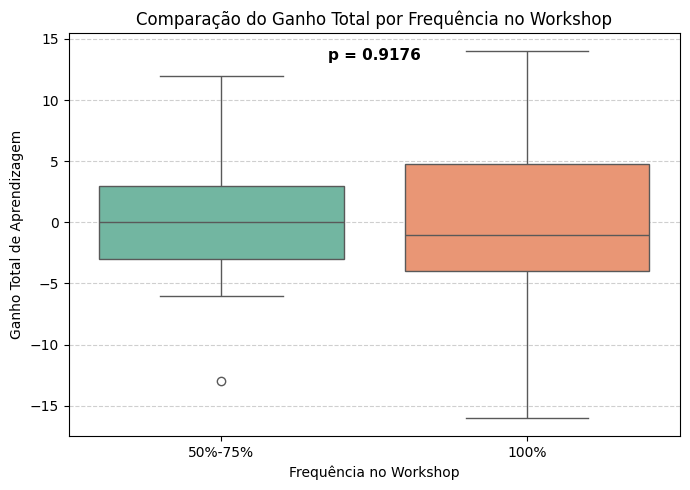

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna categórica com o grupo de frequência
df_correlacao['Grupo Frequência'] = df_correlacao['Frequência no Workshop'].apply(
    lambda x: '100%' if x == 1.0 else '50%-75%'
)

# Plotar o boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_correlacao, x='Grupo Frequência', y='Ganho Total', palette='Set2')

# Adicionar anotação com o p-valor
plt.title("Comparação do Ganho Total por Frequência no Workshop")
plt.xlabel("Frequência no Workshop")
plt.ylabel("Ganho Total de Aprendizagem")
plt.text(0.5, df_correlacao['Ganho Total'].max() * 0.95,
         f"p = {p_valor:.4f}", ha='center', fontsize=11, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecionar colunas para clusterização
variaveis_cluster = colunas_likert + ['Frequência no Workshop']

# Dados normalizados
X = df_correlacao[variaveis_cluster].copy()
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

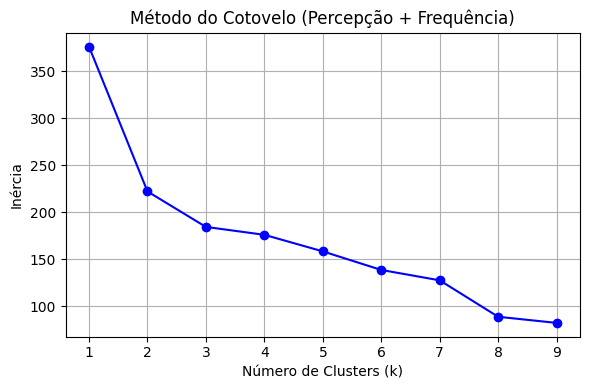

In [ ]:
inercia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalizado)
    inercia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inercia, 'bo-')
plt.title("Método do Cotovelo (Percepção + Frequência)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Suponha que você escolha k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_correlacao['cluster_novo'] = kmeans.fit_predict(X_normalizado)


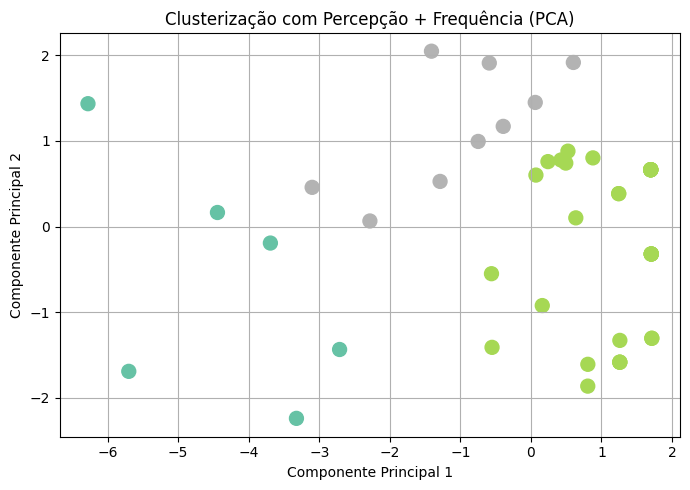

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalizado)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_correlacao['cluster_novo'], cmap='Set2', s=100)
plt.title("Clusterização com Percepção + Frequência (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_correlacao.groupby('cluster_novo')[variaveis_cluster].mean().round(2)


,O conteúdo abordado foi claro e bem estruturado.,As ferramentas digitais utilizadas foram acessíveis e fáceis de aplicar.,Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.,O curso contribuiu para minha evolução profissional.,Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.,As atividades propostas favorecerão meu aprendizado.,A IA generativa (ChatGPT/DALL·E) foi útil na criação do minicurso.,Frequência no Workshop
cluster_novo,,,,,,,,
0,4.17,4.17,2.83,3.00,2.83,3.17,3.67,0.79
1,4.94,4.91,4.44,4.94,4.78,4.91,4.91,0.80
2,4.56,4.33,4.11,4.78,3.56,4.78,3.44,0.94


In [ ]:
# Selecionar colunas de ganho por competência
colunas_ganhos = list(ganhos.columns[2:])  # Ignora Nome Completo e cluster

# Normalizar usando Z-score
ganhos_z = ganhos.copy()
for col in colunas_ganhos:
    media = ganhos[col].mean()
    desvio = ganhos[col].std()
    ganhos_z[col] = (ganhos[col] - media) / desvio


In [ ]:
ganhos_z[['Nome Completo', 'cluster'] + colunas_ganhos].head()

In [ ]:
ganhos_z.groupby('cluster')[colunas_ganhos].mean().round(2)


,"Como você avalia seu uso de ferramentas Google (Docs, Slides, Drive)?","Como avalia sua produção de apresentações visuais (Canva, Genially)?","Como avalia seu uso de quizzes e jogos digitais (Kahoot, Wordwall)?",Qual seu nível em ética digital e segurança on-line?,Como avalia sua criação de atividades em Ambiente Virtual (EBVIRTUAL)?,"Qual seu domínio em pensamento computacional (lógica, algoritmos básicos)?","Qual seu conhecimento sobre algoritmos e IA (ex: ChatGPT, recomendações)?",Como avalia sua análise crítica de mídias e notícias digitais?,Com que frequência você utiliza ferramentas digitais nas suas aulas?,Qual o seu nível de participação em formações sobre tecnologia educacional nos últimos 2 anos?
cluster,,,,,,,,,,
0,0.39,0.54,0.49,0.15,0.30,0.42,0.69,0.74,0.24,0.33
1,-0.06,-0.61,-0.18,-0.39,-0.56,-0.51,-0.29,-0.55,0.25,0.29
2,-0.32,-0.14,-0.33,0.09,0.06,-0.08,-0.45,-0.35,-0.36,-0.46


In [ ]:
import numpy as np

# Selecionar apenas as colunas da escala Likert
df_likert = df_correlacao[colunas_likert]

# Função para calcular o Alfa de Cronbach
def cronbach_alpha(df):
    k = df.shape[1]  # número de itens
    variancias_itens = df.var(ddof=1, axis=0)
    variancia_total = df.sum(axis=1).var(ddof=1)
    alpha = (k / (k - 1)) * (1 - (variancias_itens.sum() / variancia_total))
    return round(alpha, 4)

# Calcular e mostrar o alfa
alpha = cronbach_alpha(df_likert)
print(f'Alfa de Cronbach da Escala Likert: {alpha}')

Alfa de Cronbach da Escala Likert: 0.8756


In [ ]:
# Criar colunas com médias dos eixos
df_correlacao['Eixo Clareza'] = df_correlacao['O conteúdo abordado foi claro e bem estruturado.']

df_correlacao['Eixo Aplicabilidade'] = df_correlacao[[
    'As ferramentas digitais utilizadas foram acessíveis e fáceis de aplicar.',
    'Sinto-me mais preparado para usar Tecnologias Digitais em sala de aula.',
    'Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.'
]].mean(axis=1)

df_correlacao['Eixo Formação'] = df_correlacao[[
    'O curso contribuiu para minha evolução profissional.',
    'As atividades propostas favorecerão meu aprendizado.'
]].mean(axis=1)

df_correlacao['Eixo Inovação'] = df_correlacao['A IA generativa (ChatGPT/DALL·E) foi útil na criação do minicurso.']


In [ ]:
df_correlacao.groupby('cluster')[['Eixo Clareza', 'Eixo Aplicabilidade', 'Eixo Formação', 'Eixo Inovação']].mean().round(2)


,Eixo Clareza,Eixo Aplicabilidade,Eixo Formação,Eixo Inovação
cluster,,,,
0,4.82,4.20,4.53,4.47
1,5.00,4.79,4.91,4.45
2,4.58,4.33,4.63,4.47


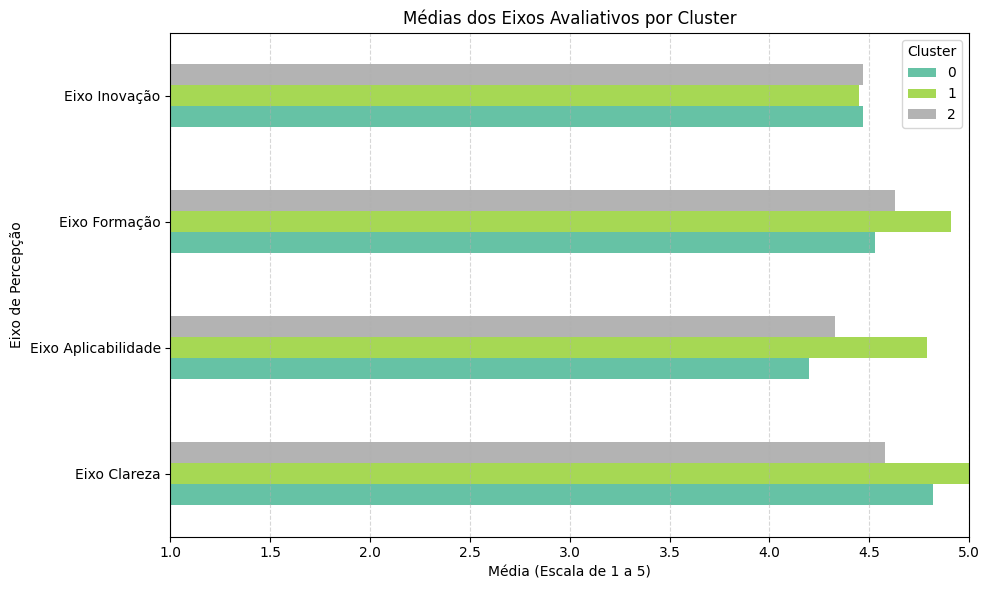

In [ ]:
# Agrupar por cluster e calcular média dos eixos
medias_eixos = df_correlacao.groupby('cluster')[[
    'Eixo Clareza', 'Eixo Aplicabilidade', 'Eixo Formação', 'Eixo Inovação'
]].mean().round(2).T

# Plotando gráfico horizontal por cluster
medias_eixos.plot(kind='barh', figsize=(10, 6), colormap='Set2')

plt.title("Médias dos Eixos Avaliativos por Cluster")
plt.xlabel("Média (Escala de 1 a 5)")
plt.ylabel("Eixo de Percepção")
plt.xlim(1, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Selecionar as colunas relevantes
col_satisfacao = 'O curso contribuiu para minha evolução profissional.'
col_aplicacao = 'Pretendo aplicar o minicurso desenvolvido em meu contexto escolar.'

# Calcular a correlação de Pearson
correlacao_aplicacao = df_correlacao[[col_satisfacao, col_aplicacao]].corr().iloc[0, 1]
print(f'Correlação entre satisfação geral e intenção de aplicar o minicurso: {correlacao_aplicacao:.4f}')


Correlação entre satisfação geral e intenção de aplicar o minicurso: 0.6425


In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'df_resultado' contenha a coluna 'Cluster' e as competências digitalizadas
variaveis_cluster = [
    'Pesquisa e navegação',
    'Google Docs',
    'Google Apresentações',
    'Google Formulários',
    'Formulários como Quiz',
    'Slides interativos',
    'Quiz e jogos digitais',
    'Pensamento Computacional',
    'Produção de Vídeo',
    'Inteligência Artificial'
]

# Calcular a média das competências por perfil
media_por_cluster = df_resultado.groupby('Cluster')[variaveis_cluster].mean()

# Transpor para gráfico horizontal
plt.figure(figsize=(10, 7))
media_por_cluster.T.plot(kind='barh')
plt.title("Comparativo das Competências Digitais por Perfil de Docente")
plt.xlabel("Média")
plt.ylabel("Competências")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Cluster', loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame final com os clusters seja df_clusters
# E que a coluna com o nome dos clusters seja 'cluster'
# E as competências estejam listadas em 'variaveis_cluster'

variaveis_cluster = [
    'Pesquisa e navegação',
    'Google Docs',
    'Google Apresentações',
    'Google Formulários',
    'Formulários como Quiz',
    'Slides interativos',
    'Quiz e jogos digitais',
    'Pensamento Computacional',
    'Produção de Vídeo',
    'Inteligência Artificial'
]

# Se o seu DataFrame com as respostas e os clusters for, por exemplo, df_clusters:
# Vamos garantir que temos isso:
df_clusters[variaveis_cluster] = df_clusters[variaveis_cluster].apply(pd.to_numeric, errors='coerce')

# Calcular a média das competências por cluster
media_por_cluster = df_clusters.groupby('cluster')[variaveis_cluster].mean()

# Plotar gráfico horizontal
plt.figure(figsize=(10, 7))
media_por_cluster.T.plot(kind='barh')
plt.title("Comparativo das Competências Digitais por Perfil de Docente")
plt.xlabel("Média das Competências")
plt.ylabel("Competência")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Cluster', loc='lower right')
plt.tight_layout()
plt.show()
